# Overview

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we target to complete the analysis of what sorts of people were likely to survive.

https://www.kaggle.com/c/titanic/data

# Import Libraries

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


# To ignore Warnings 
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [8]:
df = pd.read_csv('titanic_data.csv')

In [9]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### **Type of Features :**
- **Categorical** : Sex and Embarked
- **Continous** : Age, Fare
- **Discrete** : SibSP, ParCh
- **Alphanumeric** : Cabin

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df.shape

(891, 12)

In [16]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

# Numerical Value Analysis 

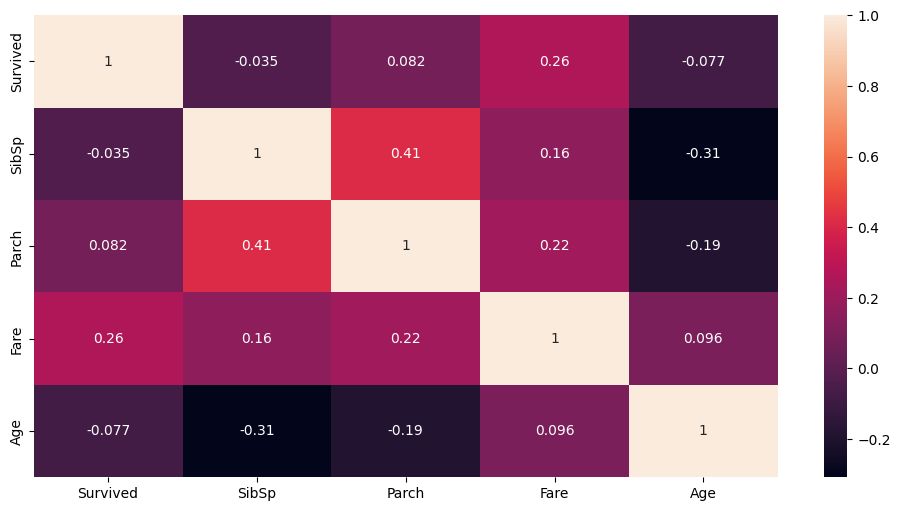

In [19]:
plt.figure(figsize = (12,6))
heatmap = sns.heatmap(df[["Survived", "SibSp", "Parch", "Fare", "Age"]].corr(), annot = True)

### <font color = "green">SibSp - Number of siblings / Spouse aboard the Titanic :</font>

In [22]:
df["SibSp"].nunique()

7

In [23]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

<Figure size 1200x600 with 0 Axes>

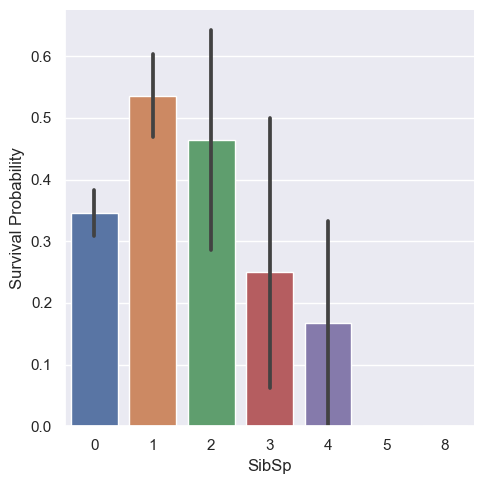

In [80]:
plt.figure(figsize = (12,6))
sns.catplot(x = 'SibSp', y = "Survived", data = df, kind = 'bar').set_ylabels('Survival Probability')
#Factorplot & Catplot are same

### <font color = "green">Age :</font>

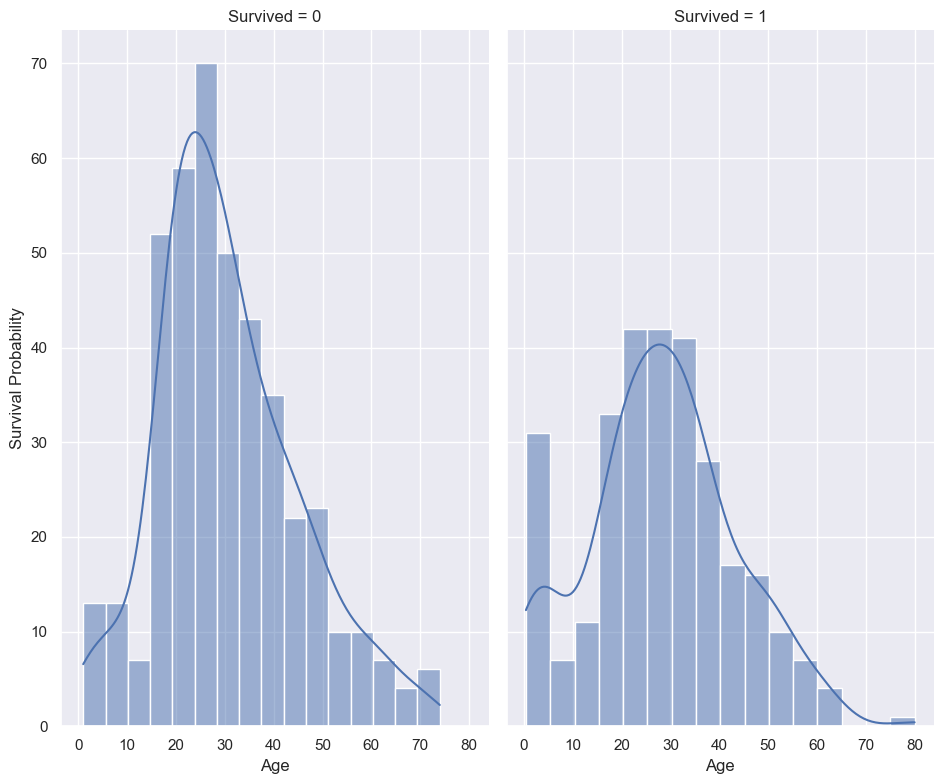

In [157]:

age_visual = sns.FacetGrid(df, col = 'Survived',height=8, aspect=.6)
age_visual = age_visual.map(sns.histplot, "Age", kde=True).set_ylabels('Survival Probability')


### <font color = "green">Gender :</font>

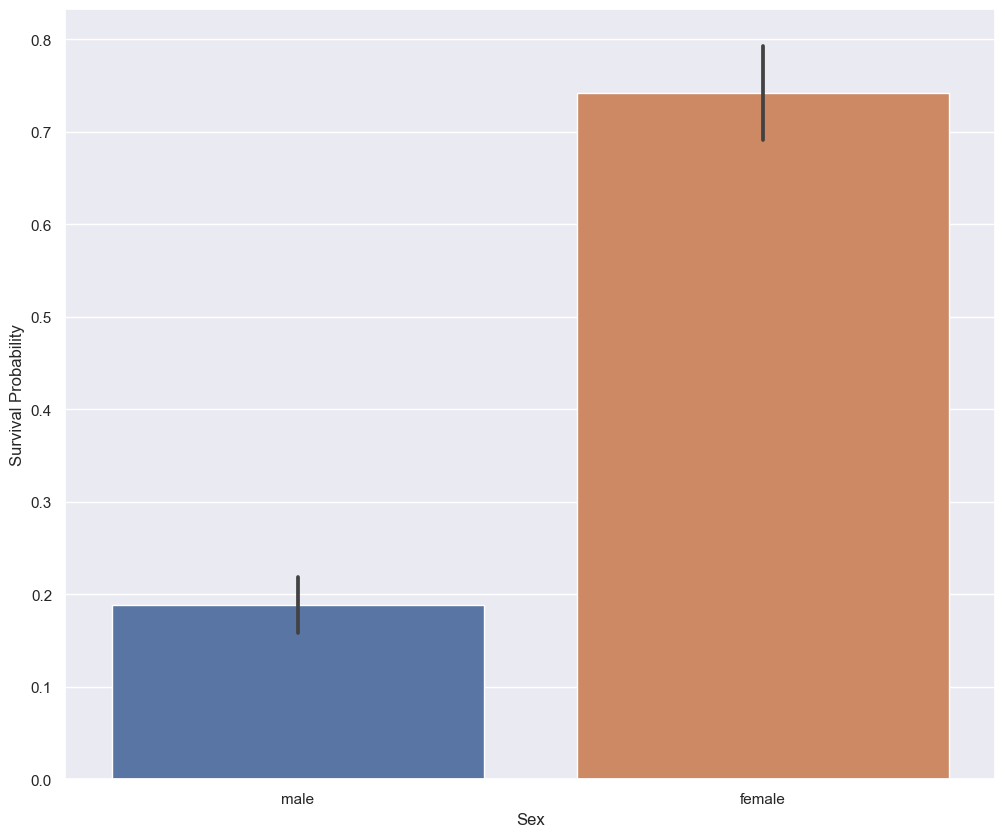

In [82]:
gender_plot = sns.barplot(x = 'Sex', y = 'Survived', data = df).set_ylabel('Survival Probability')

In [89]:
df[['Sex', 'Survived']].groupby('Sex').mean()

Survived
Sex             
female  0.742038
male    0.188908

### <font color = "green">PClass :</font>

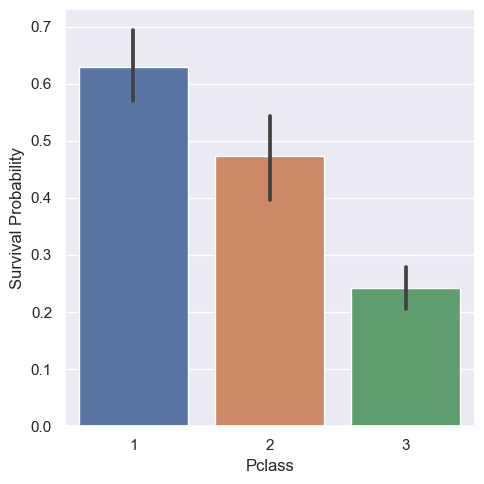

In [101]:
sns.catplot(x = 'Pclass', y = "Survived", data = df, kind = 'bar').set_ylabels('Survival Probability')


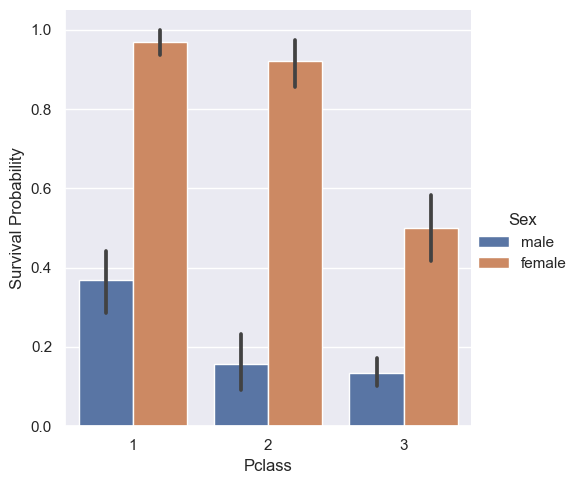

In [107]:
sns.catplot(x = 'Pclass', y = "Survived", data = df, kind = 'bar', hue = 'Sex').set_ylabels('Survival Probability')


### <font color = "green">Embarked :</font>

In [109]:
df["Embarked"].isnull().sum()

2

In [110]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [111]:
df['Embarked'] = df['Embarked'].fillna('S')

In [112]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

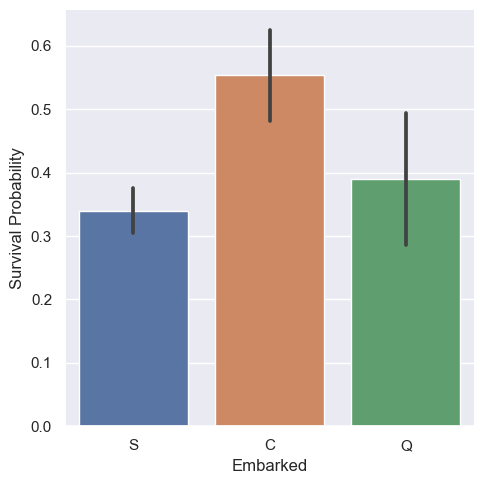

In [113]:
q = sns.catplot(x ='Embarked', y = 'Survived', data = df, kind = 'bar').set_ylabels('Survival Probability')

In [215]:
df[df['Embarked'] == 'C']['Sex'].value_counts()


male      95
female    73
Name: Sex, dtype: int64

In [208]:
df[df['Embarked'] == 'S']['Sex'].value_counts()

male      441
female    205
Name: Sex, dtype: int64

In [209]:
df[df['Embarked'] == 'Q']['Sex'].value_counts()

male      41
female    36
Name: Sex, dtype: int64

In [216]:
df[df['Embarked'] == 'C']['Age'].describe()


count    130.000000
mean      30.814769
std       15.434860
min        0.420000
25%       21.250000
50%       29.000000
75%       40.000000
max       71.000000
Name: Age, dtype: float64

In [217]:
df[df['Embarked'] == 'Q']['Age'].describe()

count    28.000000
mean     28.089286
std      16.915396
min       2.000000
25%      17.500000
50%      27.000000
75%      34.500000
max      70.500000
Name: Age, dtype: float64

In [218]:
df[df['Embarked'] == 'S']['Age'].describe()

count    556.000000
mean      29.519335
std       14.189608
min        0.670000
25%       21.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [219]:
df[df['Embarked'] == 'C']['Pclass'].value_counts()

1    85
3    66
2    17
Name: Pclass, dtype: int64

In [220]:
df[df['Embarked'] == 'Q']['Pclass'].value_counts()

3    72
2     3
1     2
Name: Pclass, dtype: int64

In [221]:
df[df['Embarked'] == 'S']['Pclass'].value_counts()

3    353
2    164
1    129
Name: Pclass, dtype: int64

# Preparing Data

In [223]:
df.shape

(891, 12)

In [224]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [231]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [229]:
df.drop('Cabin', inplace = True, axis = 1)

In [234]:
mean = df['Age'].mean()
std = df['Age'].std()

In [235]:
mean, std

(29.69911764705882, 14.526497332334044)

In [237]:
is_null = df['Age'].isnull().sum()

In [238]:
is_null


177

In [242]:
random_age = np.random.randint(mean-std, mean+std, size = is_null)

In [244]:
temp = df['Age'].copy()

In [249]:
temp[np.isnan(temp)] = random_age

In [250]:
df['Age'] = temp

In [251]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [252]:
cols_to_drop = ['PassengerId', 'Name' , 'Ticket']
df.drop(cols_to_drop, inplace = True, axis = 1)

In [253]:
df

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female  26.0      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

### Treating Categorical Parameters

In [254]:
genders = {'male': 0, 'female' : 1}
df['Sex'] = df['Sex'].map(genders)

In [255]:
df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    0  22.0      1      0   7.2500        S
1           1       1    1  38.0      1      0  71.2833        C
2           1       3    1  26.0      0      0   7.9250        S
3           1       1    1  35.0      1      0  53.1000        S
4           0       3    0  35.0      0      0   8.0500        S
..        ...     ...  ...   ...    ...    ...      ...      ...
886         0       2    0  27.0      0      0  13.0000        S
887         1       1    1  19.0      0      0  30.0000        S
888         0       3    1  26.0      1      2  23.4500        S
889         1       1    0  26.0      0      0  30.0000        C
890         0       3    0  32.0      0      0   7.7500        Q

[891 rows x 8 columns]

In [256]:
emabrk = {'S' : 0, 'C' : 1, 'Q' : 2}
df['Embarked'] = df['Embarked'].map(emabrk)

In [257]:
df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500         0
1           1       1    1  38.0      1      0  71.2833         1
2           1       3    1  26.0      0      0   7.9250         0
3           1       1    1  35.0      1      0  53.1000         0
4           0       3    0  35.0      0      0   8.0500         0
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    0  27.0      0      0  13.0000         0
887         1       1    1  19.0      0      0  30.0000         0
888         0       3    1  26.0      1      2  23.4500         0
889         1       1    0  26.0      0      0  30.0000         1
890         0       3    0  32.0      0      0   7.7500         2

[891 rows x 8 columns]

# Splitting the data 

In [258]:
x = df.drop(df.columns[[0]], axis = 1)

In [259]:
y = df['Survived']

In [262]:
from sklearn.model_selection import train_test_split

In [263]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.30, random_state = 10)

# Scaling Data

In [264]:
from sklearn.preprocessing import StandardScaler

In [265]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

# Classification

In [266]:
logistic_regression = LogisticRegression()
svc_classifier = SVC()
dc_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [267]:
logistic_regression.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dc_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [268]:
logistic_regression_ypred = logistic_regression.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dc_classifier_ypred = dc_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

# Calculating Accuracy 

In [269]:
from sklearn.metrics import accuracy_score

In [270]:
logistic_regression_acc = accuracy_score(ytest, logistic_regression_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dc_classifier_acc = accuracy_score(ytest, dc_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [273]:
print("Logistic Regression     :", round(logistic_regression_acc*100, 2))
print("Support Vector          :", round(svc_classifier_acc*100, 2))
print("Decision Tree           :", round(dc_classifier_acc*100, 2))
print("K-NN Classifier         :", round(knn_classifier_acc*100, 2))
print("Random Forest           :", round(rf_classifier_acc*100, 2))

Logistic Regression     : 80.97
Support Vector          : 82.09
Decision Tree           : 76.49
K-NN Classifier         : 80.97
Random Forest           : 81.34


In [274]:
df

Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0           0       3    0  22.0      1      0   7.2500         0
1           1       1    1  38.0      1      0  71.2833         1
2           1       3    1  26.0      0      0   7.9250         0
3           1       1    1  35.0      1      0  53.1000         0
4           0       3    0  35.0      0      0   8.0500         0
..        ...     ...  ...   ...    ...    ...      ...       ...
886         0       2    0  27.0      0      0  13.0000         0
887         1       1    1  19.0      0      0  30.0000         0
888         0       3    1  26.0      1      2  23.4500         0
889         1       1    0  26.0      0      0  30.0000         1
890         0       3    0  32.0      0      0   7.7500         2

[891 rows x 8 columns]

In [ ]:
cols_to_drop = ['Pclass', 'Embarked']
df.drop(cols_to_drop, inplace = True, axis = 1)

In [276]:
df

Survived  Sex   Age  SibSp  Parch     Fare
0           0    0  22.0      1      0   7.2500
1           1    1  38.0      1      0  71.2833
2           1    1  26.0      0      0   7.9250
3           1    1  35.0      1      0  53.1000
4           0    0  35.0      0      0   8.0500
..        ...  ...   ...    ...    ...      ...
886         0    0  27.0      0      0  13.0000
887         1    1  19.0      0      0  30.0000
888         0    1  26.0      1      2  23.4500
889         1    0  26.0      0      0  30.0000
890         0    0  32.0      0      0   7.7500

[891 rows x 6 columns]

In [278]:
cols_to_drop = ['Fare']
df.drop(cols_to_drop, inplace = True, axis = 1)

In [279]:
df

Survived  Sex   Age  SibSp  Parch
0           0    0  22.0      1      0
1           1    1  38.0      1      0
2           1    1  26.0      0      0
3           1    1  35.0      1      0
4           0    0  35.0      0      0
..        ...  ...   ...    ...    ...
886         0    0  27.0      0      0
887         1    1  19.0      0      0
888         0    1  26.0      1      2
889         1    0  26.0      0      0
890         0    0  32.0      0      0

[891 rows x 5 columns]

In [280]:
x = df.drop(df.columns[[0]], axis = 1)
y = df['Survived']
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.30, random_state = 10)

In [281]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

In [282]:
logistic_regression = LogisticRegression()
svc_classifier = SVC()
dc_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000)

In [283]:
logistic_regression.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dc_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(n_estimators=1000)

In [284]:
logistic_regression_ypred = logistic_regression.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dc_classifier_ypred = dc_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

In [285]:
logistic_regression_acc = accuracy_score(ytest, logistic_regression_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dc_classifier_acc = accuracy_score(ytest, dc_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)

In [286]:
print("Logistic Regression     :", round(logistic_regression_acc*100, 2))
print("Support Vector          :", round(svc_classifier_acc*100, 2))
print("Decision Tree           :", round(dc_classifier_acc*100, 2))
print("K-NN Classifier         :", round(knn_classifier_acc*100, 2))
print("Random Forest           :", round(rf_classifier_acc*100, 2))

Logistic Regression     : 80.22
Support Vector          : 83.21
Decision Tree           : 75.37
K-NN Classifier         : 76.12
Random Forest           : 75.0
